Sales Data Analysis

In [40]:
import pandas as pd

In [62]:
# Data Collection

df = pd.read_csv('data.csv')
df.shape

(186850, 6)

In [ ]:
# Data Cleaning
# Find NAN
print(df.isna().sum())

df = df.dropna(how='any')
df.head()


In [64]:
# 

df['Month'] = df['Order Date'].str[0:2]!= 'Or'
df['Month'] = df['Month'].astype('int64')
df[df['Order Date'].str[0:2]=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,0
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,0
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,0
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,0
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,0
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,0
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,0
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,0
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,0


In [44]:
# clean order rate

df = df[df['Order Date'].str[0:2]!='Or']
df['Order Date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 185950, dtype: object

In [45]:
#  Convert to numeric datatype
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [46]:
# Add month column
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [47]:
# Add city column

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [48]:
# Data Exploration
# What was the best month for sales? How much was earned that month
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [49]:
df.groupby(['Month']).sum()['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

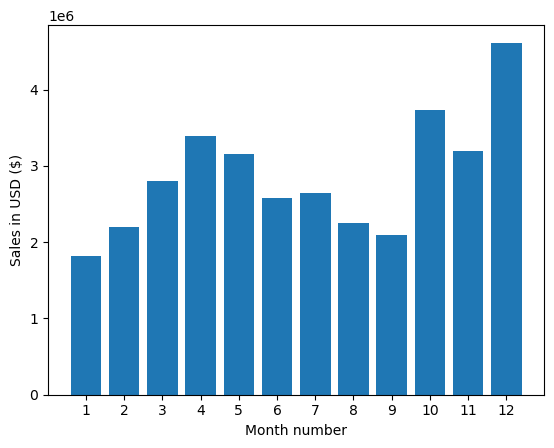

In [50]:
import matplotlib.pyplot as plt

months = range(1,13)


plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [51]:
# what city sold the most product?
results = df.groupby(['City']).sum()


['Atlanta  (GA)', 'Austin  (TX)', 'Boston  (MA)', 'Dallas  (TX)', 'Los Angeles  (CA)', 'New York City  (NY)', 'Portland  (ME)', 'Portland  (OR)', 'San Francisco  (CA)', 'Seattle  (WA)']


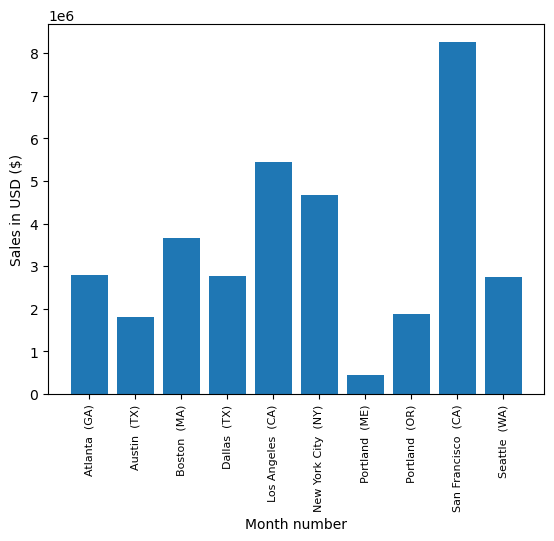

In [52]:
import matplotlib.pyplot as plt

# keys = [city for city in all_data.groupby(['City'])['City']]
# print(keys)
cities = [city for city,df in df.groupby('City')]
print(cities)

plt.bar(cities,results['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(cities, rotation='vertical', size=8)
plt.show()

In [54]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()
df.groupby(['Hour']).count()['Count']

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Count, dtype: int64

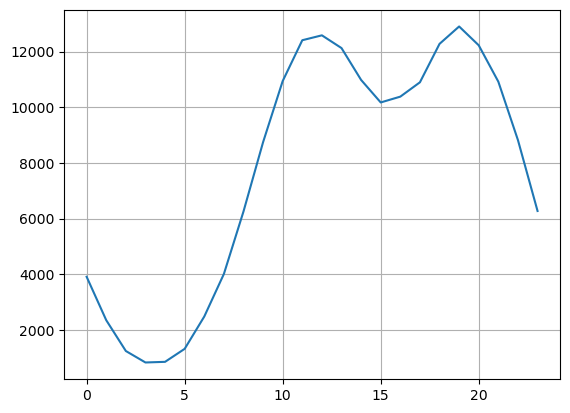

In [55]:
hours = [hour for hour, df in df.groupby(['Hour'])]

plt.plot(hours, df.groupby(['Hour']).count()['Count'])
# plt.xticks(hours)
plt.grid()
plt.show()


In [3]:
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df['Product']

0               USB-C Charging Cable
1                                NaN
2         Bose SoundSport Headphones
3                       Google Phone
4                   Wired Headphones
                     ...            
186845        AAA Batteries (4-pack)
186846                        iPhone
186847                        iPhone
186848        34in Ultrawide Monitor
186849          USB-C Charging Cable
Name: Product, Length: 186850, dtype: object

In [9]:
df[0:3]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
